In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Helper functions

In [2]:
def gaussian_1D_with_offset(x, A, s, mu, offset):
    """The Gaussian distribution, integrating to A, with a constant offset."""
    return A * np.exp(-(1/2) * (x - mu)**2 / s**2) / (s * np.sqrt(2 * np.pi)) + offset

def gaussian_1D(x, A, s, mu):
    """The Gaussian distribution, integrating to A."""
    return A * np.exp(-(1/2) * (x - mu)**2 / s**2) / (s * np.sqrt(2 * np.pi))

In [3]:
xmax = 50       # Fit results are very dependent on the range of x
x_range = np.linspace(-xmax, xmax, 200 * xmax + 1)
def full_routine(fn):
    fn_values = fn(x_range)
    popt_offset, pcov_offset = curve_fit(gaussian_1D_with_offset, x_range, fn_values, [1, 1, 0, 0])
    popt_no_offset, pcov_no_offset = curve_fit(gaussian_1D, x_range, fn_values, [1, 1, 0])

    fig, ax = plt.subplots(1, 1)
    ax.plot(x_range, fn_values, label = "Original function")
    ax.plot(x_range, gaussian_1D_with_offset(x_range, *popt_offset), label = "fit (with offset)")
    ax.plot(x_range, gaussian_1D(x_range, *popt_no_offset), label = "fit (no offset)")
    ax.legend()

    param_str_list = ["A     ", "s     ", "mu    ", "offset"]
    print("Fit results with offset:")
    for i, value in enumerate(popt_offset):
        print(f"{param_str_list[i]} = {value:.4f}")
    print("Fit results without offset:")
    for i, value in enumerate(popt_no_offset):
        print(f"{param_str_list[i]} = {value:.4f}")

# Exponential

C:\Users\ken92\AppData\Local\Temp\ipykernel_31472\3842014937.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_offset, pcov_offset = curve_fit(gaussian_1D_with_offset, x_range, fn_values, [1, 1, 0, 0])
C:\Users\ken92\AppData\Local\Temp\ipykernel_31472\3842014937.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_no_offset, pcov_no_offset = curve_fit(gaussian_1D, x_range, fn_values, [1, 1, 0])


Fit results with offset:
A      = 1.7725
s      = 0.9194
mu     = -0.0000
offset = 0.0023
Fit results without offset:
A      = 1.7857
s      = 0.9253
mu     = -0.0000


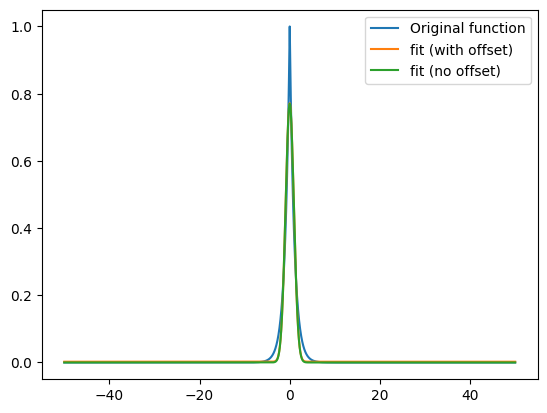

In [4]:
def exp_two_side(x, s = 1):
    return np.exp(-abs(x / s))
full_routine(exp_two_side)

# Lorentzian

Fit results with offset:
A      = 0.7542
s      = 1.0616
mu     = -0.0000
offset = 0.0023
Fit results without offset:
A      = 0.7699
s      = 1.0806
mu     = -0.0000


C:\Users\ken92\AppData\Local\Temp\ipykernel_31472\3842014937.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_offset, pcov_offset = curve_fit(gaussian_1D_with_offset, x_range, fn_values, [1, 1, 0, 0])
C:\Users\ken92\AppData\Local\Temp\ipykernel_31472\3842014937.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_no_offset, pcov_no_offset = curve_fit(gaussian_1D, x_range, fn_values, [1, 1, 0])


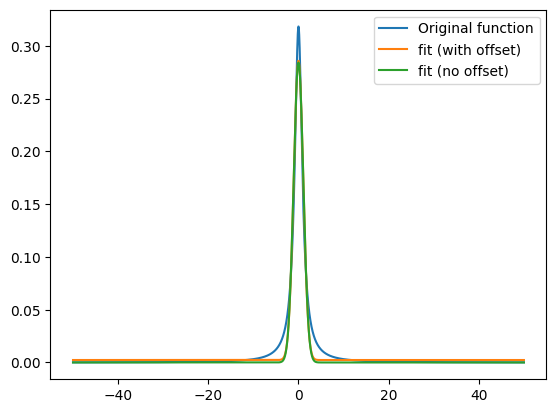

In [5]:
def lorentzian(x, gamma = 1):
    return (1 / np.pi) * (gamma / (x**2 + gamma**2))
full_routine(lorentzian)

# Sinc

Fit results with offset:
A      = 1.1899
s      = 0.4464
mu     = 0.0000
offset = -0.0019
Fit results without offset:
A      = 1.1858
s      = 0.4456
mu     = 0.0000


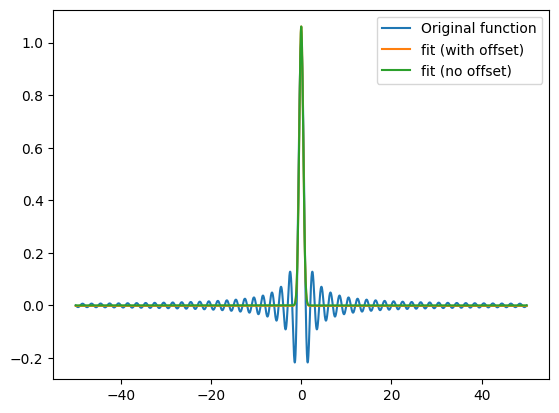

In [9]:
full_routine(np.sinc)